<a href="https://colab.research.google.com/github/saipragna25/Machine-learning-257-asgn-1-grp-/blob/main/MLA1_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Marketing

###Team: Data Wizards

Kancheti Sai Pragna [SJSU ID: 016698552]

Sravani Raparla [SJSU ID: 016656601]

chirudeep gorle [SJSU ID: 016682627]

Contributions:
Data pre-porcessing and data cleaning graphs [TEAM]

Data narrative (TEAM)

Data insights (TEAM)

Algorithms:

1 K-Means Clustering: This was implemented in TensorFlow by each     individual member of the group.

2 DBSCAN Clustering: Sai Pragna Kancheti implemented DBSCAN clustering with SciKit Learn

3 Optics Clustering: Sravani Raparla implemented Optics clustering with SciKit Learn

4 Mean Shift: chirudeep gorle implemented Optics clustering with SciKit Learn



#DATA UNDERSTANDING

### Business understanding of data:

Hunter's e-grocery is a well-known lifestyle brand for the new generation. This company, which has a presence in ten countries, is constantly looking for innovative ways to better serve and predict the needs of its clients.

 Black swan events like COVID-19, the Ukraine crisis, and the gas shortage have all impacted consumers' purchasing decisions.
 
 In this task, we will use unsupervised machine learning to classify customers according to characteristics of their purchasing behavior. By identifying customers with similar needs or responses to a certain marketing activity, predictive marketing may benefit businesses.


To classify customers we have utilized some simple clustering algorithms:

1. K-Means Clustering
  
  a. This was implemented in TensorFlow by each individual member of the group.

2. Optics Clustering
	
  a. Sravani Raparla implemented Optics clustering with SciKit Learn

3. DBSCAN Clustering
	
  a. Sai Pragna Kancheti implemented DBSCAN clustering with SciKit Learn

4. Mean Shift
  
  a. chirudeep gorle implemented Mean Shift clustering with SciKit Learn




### Dataset:

The dataset consists of 2019501 Rows & 12 Columns which are as follows :
order_id – (A unique number to identity the order)

* user_id - (A unique number to identify the user)

* order_number – (Number of the order)

* order_dow – (Day of the Week the order was made)

* order_hour_of_day – (Time of the order)

* days_since_prior_order - (History of the order)

* product_id – (Id of the product)

* add_to_cart_order – (Number of items added to cart)

* reordered – (If the reorder took place)

* department_id - (Unique number allocated to each department)

* department – (Names of the departments)

* product_name – (Name of the products)

In [ ]:
# IMPORTING PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans , k_means
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# LOADING DATA
main_data = pd.read_csv("/content/ECommerce_consumer behaviour.csv")
df = main_data.copy()
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [ ]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [ ]:
df['days_since_prior_order'].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [ ]:
# TAKING CARE OF NULL VALUES
for col in df.columns:
    if df[col].dtypes == 'float64':
        df[col].fillna(-1,inplace=True) 

In [ ]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [ ]:
# CONVERTING DATA TYPES
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


## DATA PREPARATION

In this section we will be doing the following steps:

* Investigating all elements within each feature
* Aggregating & grouping values to visualize purchasing behaviour
* Aggregating & grouping values to understand purchasing behaviour
* Aggregating & grouping values to visualize & identify the most reordered items
* Aggregating & grouping values to understand product reordered ratio
* Aggregating & grouping values to visualize reordered ratio




In [ ]:
# INVESTIGATING ALL ELEMENTS WITHIN EACH FEATURE
for colum in df:
    unique_values = np.unique(df[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

The number of unique values for features order_id : 200000
The number of unique values for features user_id : 105273
The number of unique values for features order_number : 100
The number of unique values for features order_dow : 7 --- [0 1 2 3 4 5 6]
The number of unique values for features order_hour_of_day : 24
The number of unique values for features days_since_prior_order : 32
The number of unique values for features product_id : 134
The number of unique values for features add_to_cart_order : 137
The number of unique values for features reordered : 2 --- [0 1]
The number of unique values for features department_id : 21 --- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
The number of unique values for features department : 21 --- ['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household'
 'international' 'meat seafood' 'missing' 'other' 'pantry' 'personal care'
 'pets' 'produce' 'snacks']

In [ ]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

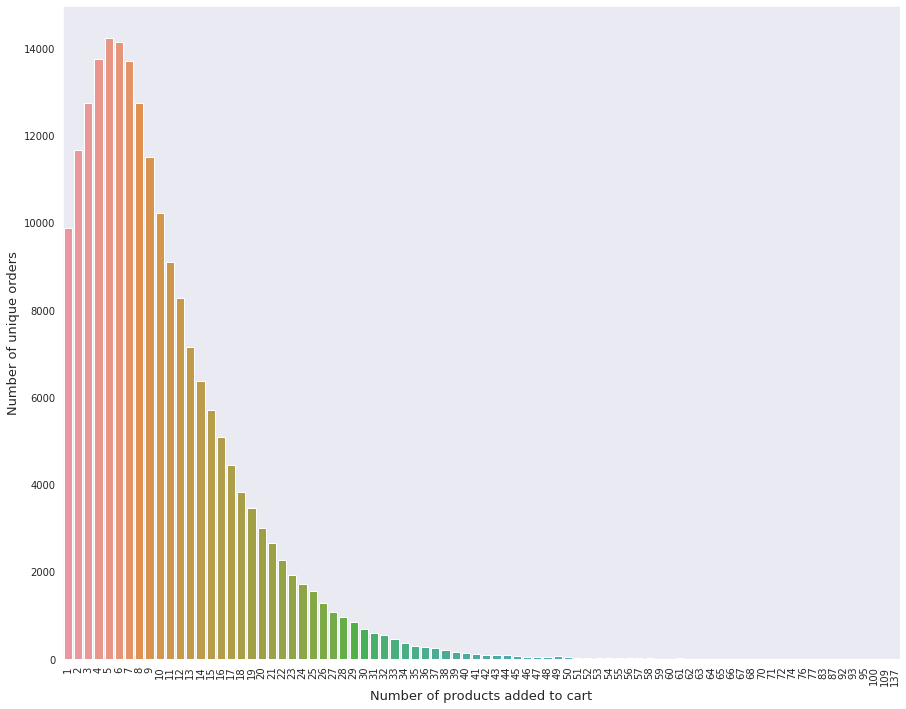

In [ ]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE PURCHASING BEHAVIOUR
grouped = df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('dark')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
sns.color_palette("husl", 10)

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Number of products added to cart', fontsize=13)
plt.show()

#From the below plot we can understand the purchasing behavior of the customers, where we could observe that customers are usually ordering on average around 4-7 products.

In [ ]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PURCHASING BEHAVIOUR
grouped = df.groupby(["product_id","product_name","department"])["reordered"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='reordered', ascending=False)[:15].reset_index()
grouped

#From the below table we can clearly observe that produce, dairy products, beverages and snacks are the top categories the customers are most interested to purchase

,index,product_id,product_name,department,reordered
0,23,24,fresh fruits,produce,226039
1,82,83,fresh vegetables,produce,212611
2,122,123,packaged vegetables fruits,produce,109596
3,119,120,yogurt,dairy eggs,90751
4,20,21,packaged cheese,dairy eggs,61502
5,83,84,milk,dairy eggs,55150
6,114,115,water seltzer sparkling water,beverages,52564
7,106,107,chips pretzels,snacks,45306
8,90,91,soy lactosefree,dairy eggs,39389
9,111,112,bread,bakery,36381


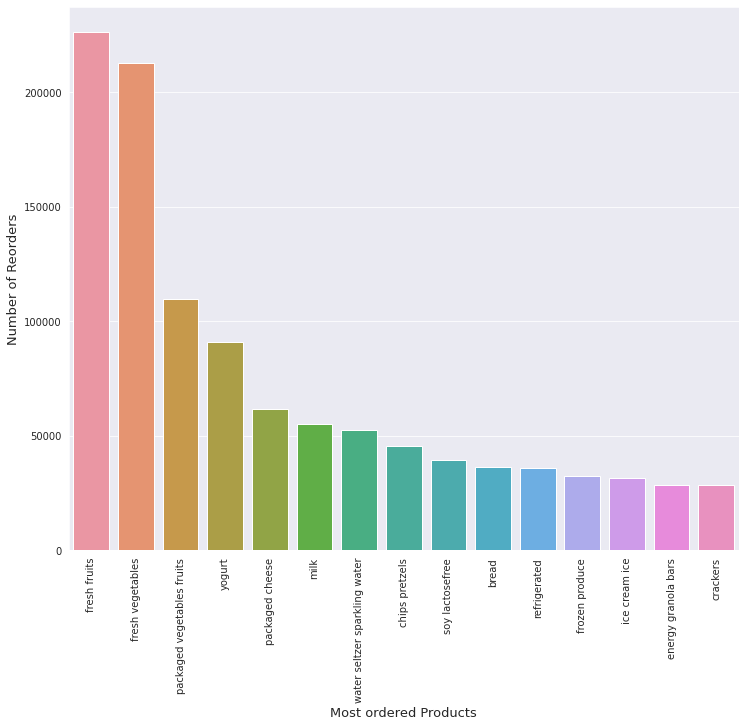

In [ ]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE & IDENTIFY THE MOST REORDERED ITEMS
grouped  = grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

#From the below analysis we could observe that "Fresh Fruits","Fresh Vegetables","Packaged Vegetables Fruits","Yogurt" & "Packaged Cheese" are top 5 most reordered products.

In [ ]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PRODUCT REORDERED RATIO
grouped = df.groupby("reordered")["product_id"].aggregate('count').reset_index()
grouped['Ratio'] = grouped["product_id"].apply(lambda x: x /grouped['product_id'].sum())
grouped

,reordered,product_id,Ratio
0,0,828515,0.410257
1,1,1190986,0.589743


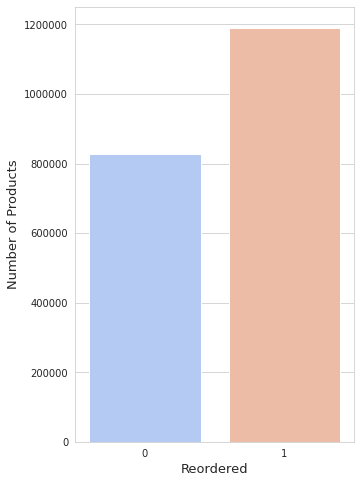

In [ ]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE REORDERED RATIO
grouped  = grouped.groupby(['reordered']).sum()['product_id'].sort_values(ascending=False)

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 8))
sns.barplot(grouped.index, grouped.values, palette='coolwarm')
plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#From the below we can see that 59 % of products were reordered by customers.

## MODELING : K-MEANS ALGORITHM

Team- Each team member has submitted their implementation separately -K-Means Clustering with Tensorflow


In [ ]:
len(df.product_id.unique())

134

In [ ]:
# UNDERSTANDING DATA DISTRIBUTION BY USING CROSSTAB TO GET ROW WISE PROPORTION FOR EARCH DEPARTMENT
clst_prd = pd.crosstab(df['user_id'], df['department'])
clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,3,3
3,0,0,0,1,0,0,0,5,0,0,...,1,0,0,0,0,1,0,0,6,3
7,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
10,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,0,0,1,0,0,0,0,1,4,0
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
206206,0,0,0,2,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,4


In [ ]:

# RUNNING K-MEANS
X_train = clst_prd.values

# WE WILL START WITH 6 CLUSTERS FOR EXPLORATION
kmeans = KMeans(n_clusters=6, random_state=540)
kmeans = kmeans.fit(X_train)

# PRINT THE CLUSTERS THAT IS ASSIGNED FOR EACH OBSERVATION
print("The cluster are  :", kmeans.labels_)

# PRINT INERTIA
print("The Inertia is :", kmeans.inertia_)


The cluster are  : [0 2 4 ... 0 2 4]
The Inertia is : 4996208.43917668


In [ ]:
# RUNNING K-MEANS ON A RANG OF CLUSTERS TO FIND OPTIMAL NUMBER
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)
    

The inertia for : 2 Cluster is :  7543563.615122272
The inertia for : 3 Cluster is :  6284972.054315539
The inertia for : 4 Cluster is :  5731867.711694658
The inertia for : 5 Cluster is :  5281366.432549876
The inertia for : 6 Cluster is :  4996208.43917668
The inertia for : 7 Cluster is :  4763209.24528482
The inertia for : 8 Cluster is :  4586277.708068137
The inertia for : 9 Cluster is :  4436399.2237132825


Text(0.5, 1.0, 'Inertia Plot per k')

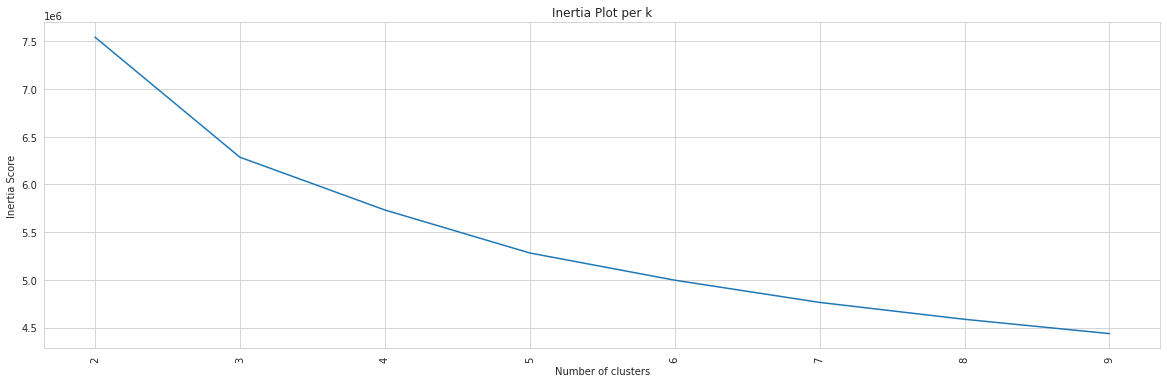

In [ ]:
# CREATING SCREE PLOT TO VISUALIZE INERTIA - ELBOW METHOD
fig, (ax1) = plt.subplots(1, figsize =(20,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
import tensorflow as tf

In [ ]:
points=clst_prd.values
def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

num_clusters = 5
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

# train
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  previous_centers = cluster_centers

# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(points):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
Prefer Dataset.range instead.
Instructions for updating:
Use standard file utilities to get mtimes.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


In [ ]:
'''
# PREDICTIONS FOR NEW DATA
predictions = kmeans.predict(points)

# CALCULATING THE COUNTS FOR THE CLUSTER
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# CREATING THE PLOT
countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

# DISPLAY THE PLOT
countscldf
'''

## DBSCAN algorithm - Sai pragna kancheti


In [37]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=0.3, min_samples=10).fit(clst_prd.values)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 399
Estimated number of noise points: 90753


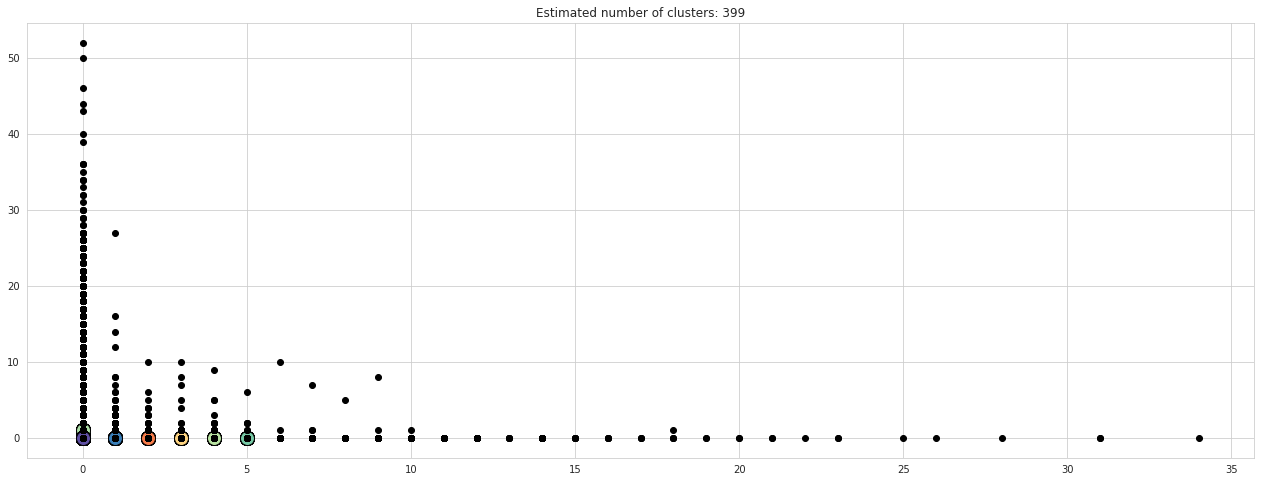

In [38]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = clst_prd.values[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = clst_prd.values[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('DBSCAN Clustering') 
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.gcf().set_size_inches(22,8)
plt.show()
#DBSCAN(eps=3, min_samples=2)

## OPTICS clustering algorithm - Sravani raparla


In [40]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from matplotlib import gridspec 
 bnm]=hb wa
# Building the OPTICS Clustering model 
optics_model = OPTICS(min_samples = 30, xi = 0.8, min_cluster_size = 0.08)

# Training the model 
optics_model.fit(clst_prd.values)  #clst_prd.values
print('number of hierarchical clusters',len(optics_model.cluster_hierarchy_)-1)

number of hierarchical clusters 0


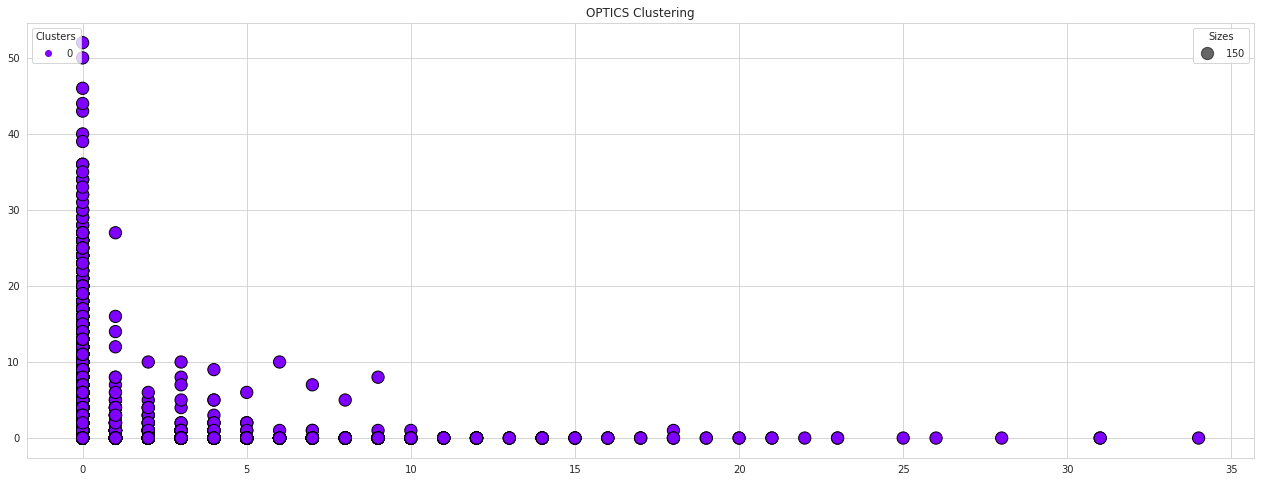

In [41]:
fig, ax = plt.subplots()

scatter = ax.scatter(clst_prd.values[:,0],clst_prd.values[:,1], s=150,marker='o',edgecolors='black' ,c = optics_model.labels_, cmap ="rainbow")
classes = ['1', '2', '3','4']
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Clusters")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
plt.title('OPTICS Clustering') 
plt.gcf().set_size_inches(22,8)
plt.show()

In [42]:
# the specified range 
space = np.arange(len(clst_prd.values)) 
  
# Storing the reachability distance of each point 
reachability = optics_model.reachability_[optics_model.ordering_] 
  
# Storing the cluster labels of each point 
labels = optics_model.labels_[optics_model.ordering_] 
#print(labels)

Text(0.5, 1.0, 'Reachability Plot')

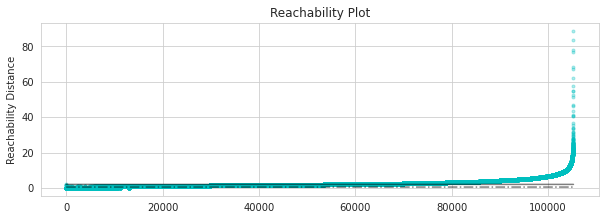

In [43]:
# Defining the framework of the visualization 
plt.figure(figsize =(10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :])

 

# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot')

## Mean Shift algorithm - (chirudeep gorle )


In [44]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
ms = MeanShift()
ms.fit(clst_prd.values)
cluster_centers = ms.cluster_centers_